In [7]:
import numpy as np
import random
from numpy.linalg import cholesky
import matplotlib.pyplot as plt

In [69]:
def calDistance(point1,point2):
    return np.linalg.norm(point1 - point2)

def updateCluster(point_set, mean_center):
    clusters = []
    for i in range(len(mean_center)):
        clusters.append([mean_center[i]])
    
    for point in point_set:
        d = []
        for i,mean in enumerate(mean_center): 
            d.append(calDistance(np.array(point), np.array(mean)))
        cluster_index = np.argmin(d)
        clusters[cluster_index].append(point)
    return clusters

In [79]:
from scipy.stats import multivariate_normal

def calGaussProb(vector, mean, cov):
    var = multivariate_normal(mean, cov)
    return var.pdf(vector) / var.pdf(mean)

def updateClusterGauss(point_set, mean_center, clusters):
    covs = []
    for i,cluster in enumerate(clusters):
        covs.append(np.cov(np.array(cluster).T))
    
    new_clusters = []
    for i,mean in enumerate(mean_center):
        new_clusters.append([mean])
        
    for point in point_set:
        p = []
        for i,[mean,cov] in enumerate(zip(mean_center,covs)):
            p.append(calGaussProb(np.array(point), np.array(mean), cov))
        cluster_index = np.argmax(p)
        clusters[cluster_index].append(point)
    return clusters

In [80]:
def updateClusterCenter(clusters):
    mean_center = []
    for cluster in clusters:
        sum_x = 0.
        sum_y = 0.
        for p in cluster:
            sum_x += p[0]
            sum_y += p[1]
        mean_center.append([sum_x/len(cluster), sum_y/len(cluster)])
    return mean_center

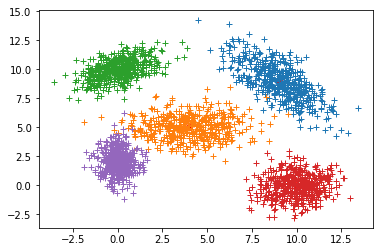

In [81]:
point_set = []
mean = np.array([[9,9], [4,5], [0,10], [10,0], [0,2]])
sigma = np.array([[[1,-1],[-1,4]],
                  [[3,0],[0,1]],
                  [[1,0.5],[0.5,1]],
                  [[1,1.5],[0.1,0.9]],
                  [[0.3,0],[0,1]]
                 ])
for seed in mean:
    point_set.append(seed.tolist())
plt.plot(mean[:,0],mean[:,1],"ro")

for i in range(len(mean)):
    R = cholesky(sigma[i])
    s = np.dot(np.random.randn(500,2),R) + mean[i]
    for point in s:
        point_set.append(point.tolist())
    plt.plot(s[:,0],s[:,1],"+")

0 iter result,moving distance of center = 13.840441137938202
1 iter result,moving distance of center = 4.940599047237066
2 iter result,moving distance of center = 1.3903081256002912
3 iter result,moving distance of center = 1.1600497223670736
4 iter result,moving distance of center = 2.147865376074954
5 iter result,moving distance of center = 3.645901538266412
6 iter result,moving distance of center = 2.2437699374728424
7 iter result,moving distance of center = 0.4679385802727653
8 iter result,moving distance of center = 0.06027080674029308
9 iter result,moving distance of center = 0.00011946874571086666
10 iter result,moving distance of center = 2.3690192222533884e-07
11 iter result,moving distance of center = 4.69984133198195e-10
12 iter result,moving distance of center = 9.329060719633257e-13
13 iter result,moving distance of center = 2.141028997094345e-15
14 iter result,moving distance of center = 0.0
15 iter result,moving distance of center = 0.0
oral center = 
[9 9]
[4 5]
[ 0 10]

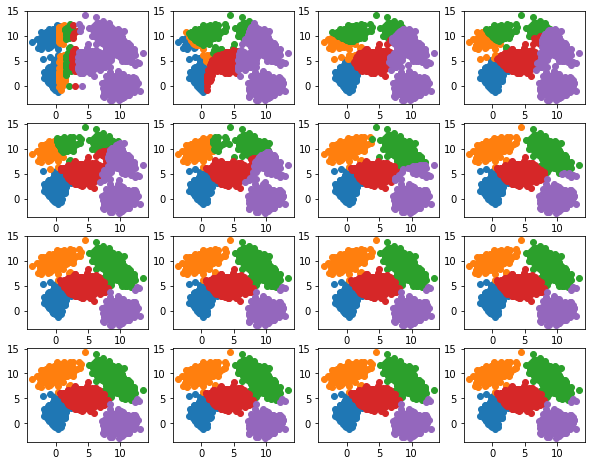

In [83]:
mean_center = [[0,0], [1,0], [2,0], [3,0], [4,0]]
iters = 16
plt.figure(figsize=(10,10))
for iter in range(iters):
    plt.subplot(int(iters)/4 + 1,4,iter+1)
    clusters = updateCluster(point_set, mean_center)
#     clusters = updateClusterGauss(point_set, mean_center,clusters)
    for i in range(len(clusters)):
        s = np.array(clusters[i])
        if len(s) > 1:
            plt.plot(s[:,0],s[:,1],"o")
    new_mean_center = updateClusterCenter(clusters)
    print("{} iter result,moving distance of center = {}".format(iter,calDistance(np.array(new_mean_center),np.array(mean_center))))
    mean_center = new_mean_center

print("oral center = ")
for center in mean:
    print(center)
print("after k-means: center =")
for center in mean_center:
    print("{}".format(center))
print("oral simga = \n{}\nafter k-means,sigma = ".format(sigma))
for cluster in clusters:
    print(np.cov(np.array(cluster).T))

另一种生成高斯分布的方法

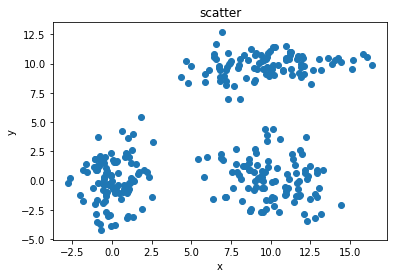

In [23]:
def gen_clusters(): 
    mean1 = [0,0] 
    cov1 = [[1,0],[0,4]] 
    data = np.random.multivariate_normal(mean1,cov1,100) 
    mean2 = [10,10] 
    cov2 = [[6,0],[0,1]] 
    data = np.append(data, np.random.multivariate_normal(mean2,cov2,100), 0) 
    mean3 = [10,0] 
    cov3 = [[3,0],[0,4]] 
    data = np.append(data, np.random.multivariate_normal(mean3,cov3,100), 0) 
    return np.round(data,4)

def show_scatter(data): 
    x,y = data.T 
#     plt.scatter(x,y,'o') 
    plt.plot(x,y,"o")
    plt.axis() 
    plt.title("scatter") 
    plt.xlabel("x") 
    plt.ylabel("y")
data = gen_clusters()
show_scatter(data)

给定高斯分布密度，求给定向量的概率，纯数学计算公式

from numpy import * 
import math 
sigma = matrix([[2.3, 0, 0, 0], [0, 1.5, 0, 0], [0, 0, 1.7, 0], [0, 0, 0, 2] ]) 
mu = array([2,3,8,10]) 
x = array([2,3,8, 10]) 
def norm_pdf_multivariate(x, mu, sigma): 
    size = len(x) 
    if size == len(mu) and (size, size) == sigma.shape: 
        det = linalg.det(sigma) 
        if det == 0: 
            raise NameError("The covariance matrix can't be singular") 
        norm_const = 1.0/ ( math.pow((2*pi),float(size)/2) * math.pow(det,1.0/2) ) 
        x_mu = matrix(x - mu) 
        inv = sigma.I 
        result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T)) 
        return norm_const * result 
    else: 
        raise NameError("The dimensions of the input don't match") 
print(norm_pdf_multivariate(x, mu, sigma)/norm_pdf_multivariate(mu, mu, sigma))